#### In this lab, we explore the resampling techniques covered in this video

In [1]:
#Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score, ShuffleSplit
plt.style.use('fivethirtyeight')


%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking the data

In [4]:
mean

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### The data looks clean. So we can start with the analysis.

## Basic Exploratory Data Analysis

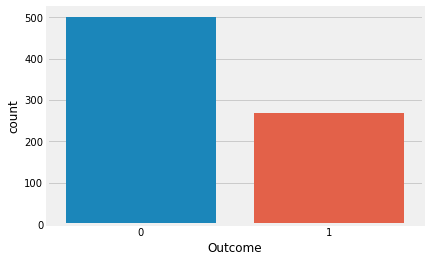

In [5]:
sns.countplot(x='Outcome',data=df)
plt.show()

## Pair Plots

/Users/ngough/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/ngough/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/ngough/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


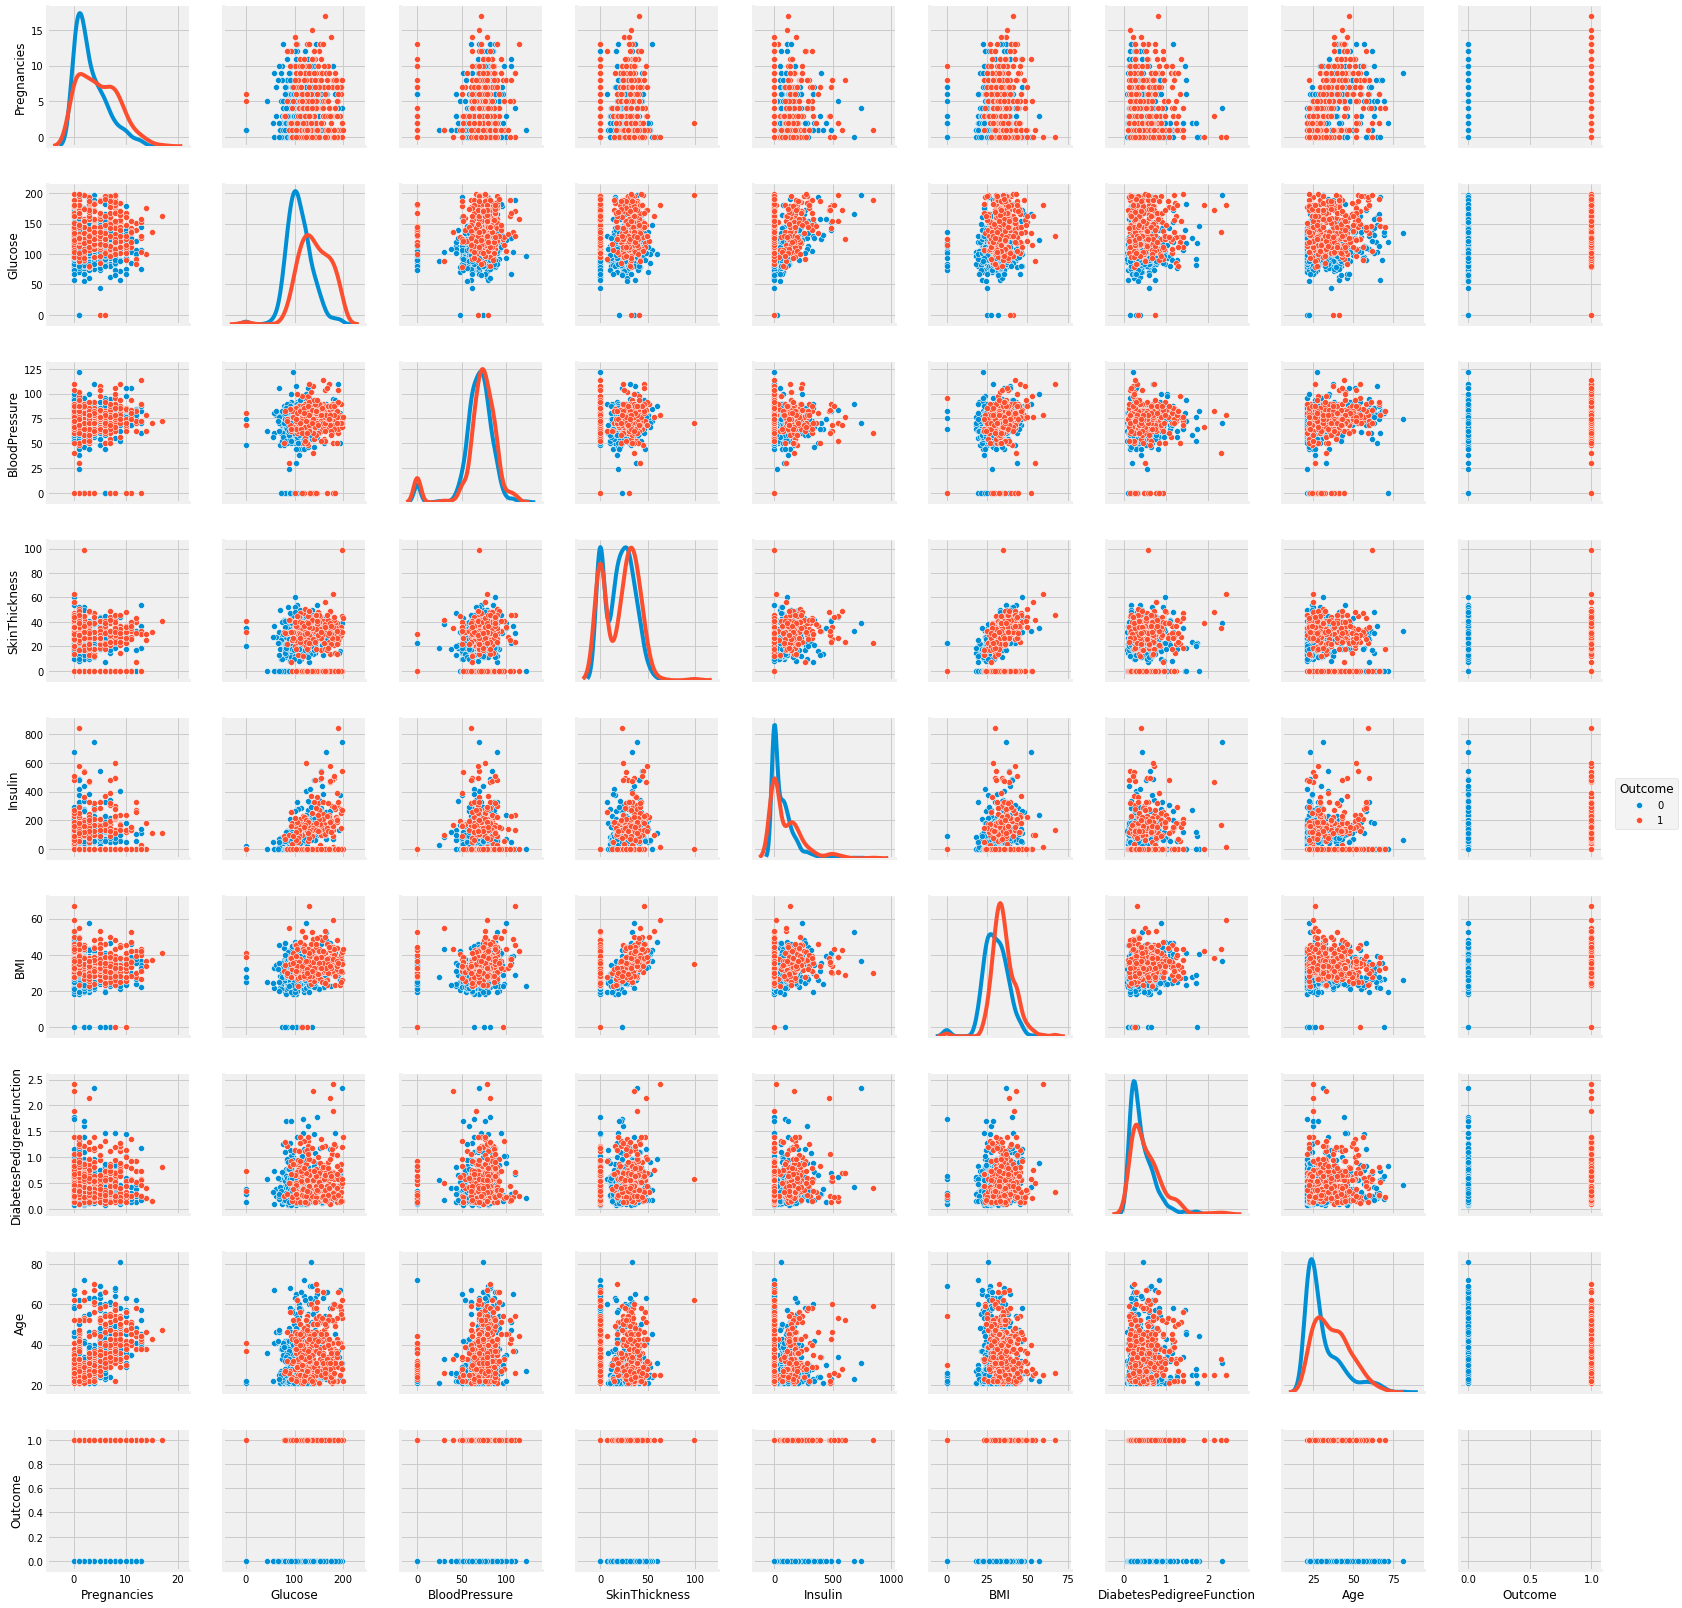

In [6]:
sns.pairplot(data=df,hue='Outcome',diag_kind='kde')
plt.show()

#### Observations

1) The diagonal shows the distribution of the the dataset with the kernel density plots.

2) The scatter-plots shows the relation between each and every features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two class instances.

## Correlation Matrix

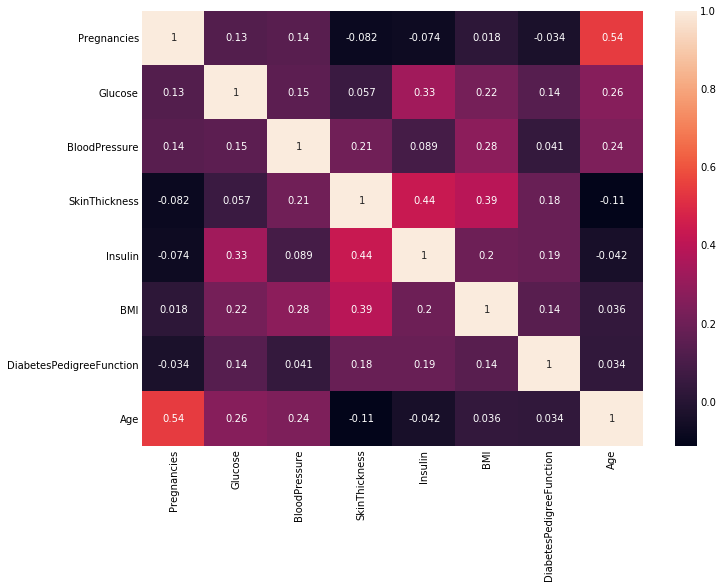

In [7]:
sns.heatmap(df[df.columns[:8]].corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### Observations

1) All features look to be uncorrelated. So we cannot eliminate any features just by looking at the correlation matrix.

## Predictive modelling

In [8]:
#Stratify sampling

label = df['Outcome']
features = df[df.columns[:8]]
train,test = train_test_split(df,test_size=0.30,random_state=0,stratify=label)
X_train = train[train.columns[:8]]
X_test = test[test.columns[:8]]
Y_train = train['Outcome']
Y_test = test['Outcome']

In [9]:
accuracy=[]
classifiers=['Logistic Regression','KNN','Decision Tree']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=4),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(X_train,Y_train)
    prediction=model.predict(X_test)
    accuracy.append(metrics.accuracy_score(prediction,Y_test))
models_dataframe=pd.DataFrame(accuracy,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Logistic Regression,0.787879
KNN,0.753247
Decision Tree,0.722944


## K-fold Cross Validation using the Logistic Regression model

In [10]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed) # k=10

model = LogisticRegression()
results = cross_val_score(model, features, label, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 76.95% (4.84%)


## Leave One Out Cross Validation

In [11]:
loocv = LeaveOneOut()

model = LogisticRegression()
results = cross_val_score(model, features, label, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.823% (42.196%)


## Repeated Random Test-Train Splits

In [12]:
seed = 7
test_size = 0.33

kfold = ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, features, label, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.496% (1.698%)


## Boostrap

In [13]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

values = df.values
# configure bootstrap

n_iterations = 50
n_size = int(len(df) * 0.50)

In [15]:
# run bootstrap

stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = LogisticRegression()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    print(score)
    stats.append(score)

0.7652173913043478
0.789247311827957
0.7720430107526882
0.7443946188340808
0.7827004219409283
0.7670940170940171
0.7639484978540773
0.7698924731182796
0.7622080679405521
0.7944325481798715
0.7692307692307693
0.7702127659574468
0.7451820128479657
0.7323340471092077
0.7607758620689655
0.7758620689655172
0.7693965517241379
0.7641921397379913
0.759493670886076
0.7115384615384616
0.7548387096774194
0.7692307692307693
0.7542735042735043
0.7752100840336135
0.7381974248927039
0.782051282051282
0.7145877378435518
0.7613882863340564
0.7657266811279827
0.7791932059447984
0.7472766884531591
0.7749469214437368
0.7379454926624738
0.7531914893617021
0.7692307692307693
0.7663755458515283
0.7531914893617021
0.7579617834394905
0.7690631808278867
0.7066381156316917
0.7377398720682303
0.7621052631578947
0.7647058823529411
0.7393162393162394
0.7219827586206896
0.7531914893617021
0.7404255319148936
0.7532188841201717
0.7436974789915967
0.7376344086021506


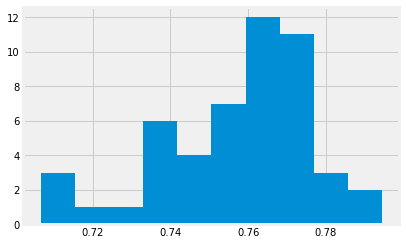

In [16]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()


In [17]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 71.2% and 78.8%
